In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import Model

In [2]:
data = pd.read_csv("ner_dataset.csv", encoding="latin1")

In [3]:
data.head(50)


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
5,NaN,through,IN,O
6,NaN,London,NNP,B-geo
7,NaN,to,TO,O
8,NaN,protest,VB,O
9,NaN,the,DT,O


In [4]:

data = data.fillna(method="ffill")
data.head(50)



,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [5]:
print("Unique words in corpus:", data['Word'].nunique())


Unique words in corpus: 18758


In [6]:
print("Unique tags in corpus:", data['Tag'].nunique())



Unique tags in corpus: 17


In [7]:
words=list(data['Word'].unique())


In [8]:
words.append("ENDPAD")


In [9]:
tags=list(data['Tag'].unique())



In [10]:
print("Unique tags are:", tags)



Unique tags are: ['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim', 'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve', 'I-eve', 'I-nat']


In [11]:
num_words = len(words)


In [12]:
num_tags = len(tags)

num_words

18759

In [13]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None



NIVETHA .K 212222230102


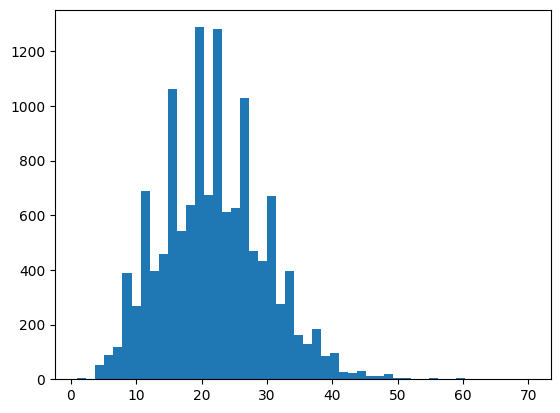

In [16]:
print("NIVETHA .K 212222230102")
getter = SentenceGetter(data)
sentences = getter.sentences

len(sentences)

sentences[0]

word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

word2idx


plt.hist([len(s) for s in sentences], bins=50)
plt.show()

X1 = [[word2idx[w[0]] for w in s] for s in sentences]
type(X1[0])
X1[0]
max_len = 50

X = sequence.pad_sequences(maxlen=max_len,
                  sequences=X1, padding="post",
                  value=num_words-1)

In [17]:
X[0]
y1 = [[tag2idx[w[2]] for w in s] for s in sentences]

y = sequence.pad_sequences(maxlen=max_len,
                  sequences=y1,
                  padding="post",
                  value=tag2idx["O"])

X_train, X_test, y_train, y_test = train_test_split(X, y,

                                                    test_size=0.2, random_state=1)

In [22]:
X_train[0]
y_train[0]

input_word = layers.Input(shape=(max_len,))
embedding_layer=layers.Embedding(input_dim=num_words,output_dim=50,input_length=max_len)(input_word)
dropout_layer=layers.SpatialDropout1D(0.1)(embedding_layer)
bidirectional_lstm=layers.Bidirectional(
    layers.LSTM(units=100,return_sequences=True,
                recurrent_dropout=0.1))(dropout_layer)
output=layers.TimeDistributed(
      layers.Dense(num_tags,activation="softmax"))(bidirectional_lstm)
model = Model(input_word, output)
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [23]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 50, 50)            937950    
                                                                 
 spatial_dropout1d_2 (Spati  (None, 50, 50)            0         
 alDropout1D)                                                    
                                                                 
 bidirectional_2 (Bidirecti  (None, 50, 200)           120800    
 onal)                                                           
                                                                 
 time_distributed_2 (TimeDi  (None, 50, 17)            3417      
 stributed)                                                      
                                                           

In [24]:
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test,y_test),
    batch_size=32,
    epochs=3,
)

metrics = pd.DataFrame(model.history.history)
metrics.head()


Epoch 1/3
332/332 [==============================] - 82s 229ms/step - loss: 0.3606 - accuracy: 0.9333 - val_loss: 0.1800 - val_accuracy: 0.9464
Epoch 2/3
332/332 [==============================] - 65s 195ms/step - loss: 0.1392 - accuracy: 0.9578 - val_loss: 0.1105 - val_accuracy: 0.9707
Epoch 3/3
332/332 [==============================] - 66s 198ms/step - loss: 0.0804 - accuracy: 0.9777 - val_loss: 0.0784 - val_accuracy: 0.9782


,loss,accuracy,val_loss,val_accuracy
0,0.360624,0.933262,0.180013,0.946411
1,0.139177,0.957805,0.110489,0.970652
2,0.080391,0.977677,0.078402,0.978192


NIVETHA.K 212222230102


<Axes: >

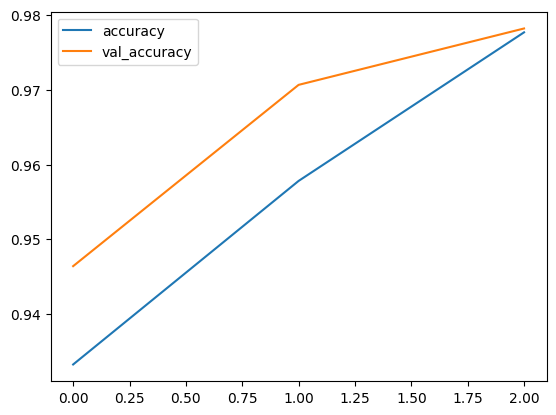

In [31]:
print("NIVETHA.K 212222230102")
metrics[['accuracy','val_accuracy']].plot()


NIVETHA .K 212222230102


<Axes: >

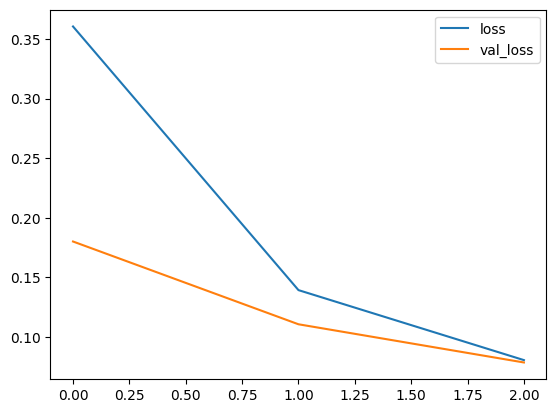

In [32]:
print("NIVETHA .K 212222230102")
metrics[['loss','val_loss']].plot()

In [27]:
i = 20
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))


1/1 [==============================] - 0s 485ms/step
Word           True 	 Pred



In [28]:
print("-" *30)


------------------------------


In [30]:
print("NIVETHA.K 212222230102")
for w, true, pred in zip(X_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

NIVETHA.K 212222230102
Congressional  O	O
officials      O	O
say            O	O
the            O	O
United         B-geo	B-geo
States         I-geo	I-geo
provided       O	O
$              O	O
2.5            O	O
million        O	O
to             O	O
Riyadh         B-geo	B-org
in             O	O
2005           B-tim	B-tim
and            I-tim	O
2006           I-tim	B-tim
.              O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bias           O	O
bi